# **Study Kasus Regresi Linear Sederhana**

# 1) Load *Data*

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/PRAKTIKUM ML/Praktikum03"

In [4]:
import pandas as pd

## buat data frame
df = pd.read_csv(path + '/data/socr.csv')
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [5]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


# 2) Pra Proses Data, Konversi data menjadi satuan cm (tinggi) dan kg (berat)

In [6]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
        .rename(columns={"Height(Inches)": "tinggi_cm",
                         "Weight(Pounds)": "berat_kg"})
        .assign(
            tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
            berat_kg=lambda d: d["berat_kg"] * 0.453559237
            )
        .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


# 5) Pembagian Data, 80% data traininf dan 20% data testing

In [7]:
from sklearn.model_selection import train_test_split

# Variabel independent/bebas/fitur : tinggi badan
X = df1[['tinggi_cm']]
# Variabel independent/bebas/fitur : berat badan
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print('Jumlah data training' , len(X_train))
print('Jumlah data testing' , len(X_test))

Jumlah data training 20000
Jumlah data testing 5000


# 6) Pemodelan : Training dan Testing data

In [8]:
from sklearn.linear_model import LinearRegression

# buat objek instan dari class LinearRegression bernama model
model = LinearRegression()

# Jalankan Training
model.fit(X_train, y_train)

LinearRegression()

# 7) Evaluasi Model

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prediksi dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume =pd.DataFrame()
df_resume['N0'] = '1'
df_resume['Koefisien )kg per cm)']= model.coef_[0]
df_resume ['Intersep (kg)       ']= model.intercept_
df_resume ['MAE (kg)            ']= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE(kg)']=mse
df_resume['RMSE (kg)']=rmse
df_resume['R-Square']=r2

df_resume


,N0,Koefisien )kg per cm),Intersep (kg),MAE (kg),MSE(kg),RMSE (kg),R-Square
0,NaN,0.551783,-37.654403,3.670205,21.240252,4.608715,0.249895


# Cetak Persamaan Regresinya

In [11]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.654


# **Multiple Linear Regresi**

# 1) Membaca data File CSV

In [38]:
import pandas as pd

## buat data frame
df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv', sep=',')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


# 2) Melihat informasi umum pada data

In [39]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


# 3) Data Pre_processing

In [40]:
df1 = (df[["Berat Badan (kg)","Jenis Kelamin","Umur (bulan)","Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk","Umur (bulan)":"umur_bulan",
                        "Tinggi Badan (cm)":"tinggi_cm","Berat Badan (kg)":"berat_kg"}).copy())

## Laki-laki: 1, Perempuan : 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bulan,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


# 4) Analisis Korelasi

In [41]:
# Hitung  matriks korelasi
corr_matrix = df1.corr()

print(corr_matrix)

            berat_kg        jk  umur_bulan  tinggi_cm
berat_kg    1.000000  0.045797    0.665389   0.626005
jk          0.045797  1.000000    0.004046   0.073505
umur_bulan  0.665389  0.004046    1.000000   0.875869
tinggi_cm   0.626005  0.073505    0.875869   1.000000




*   Buat Heatmap Grafik



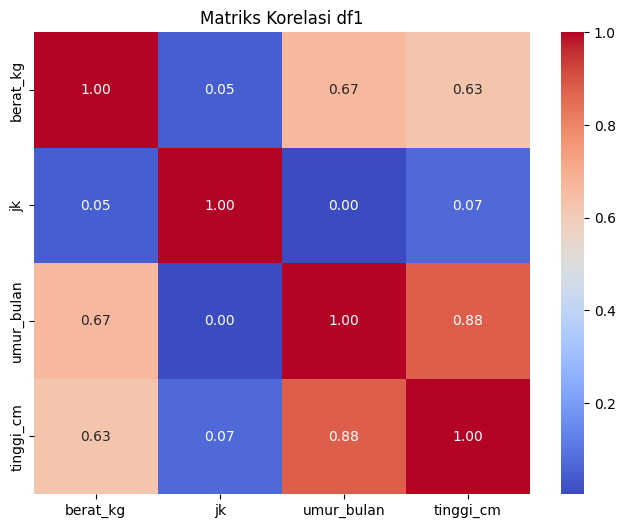

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

# 5) Membagi Dataset untuk Training dan Test

In [43]:
## membagi dataset menjadi 80% data training dan 20% data testing
from sklearn.model_selection import train_test_split

#Misalkan target (Y)adalah berat badan, #Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, #Variabel independen
X = df1[["umur_bulan", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
)

# Cetak pembagian data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

## Cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,umur_bulan,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


# 6) Pemodelan



*   Cek Data Training Apakah Telah Memiliki Nilai Konstan atau Tidak



In [44]:
import statsmodels.api as sm

## Tambahkan Konstanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bulan,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5




*   Pemodelan dengan Pustaka Program OLS



In [45]:
import statsmodels.api as sm

#Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')
const = model.params['const']
x1_umur = model.params['umur_bulan']
x2_tinggi = model.params['tinggi_cm']

# Print persamaan regresi
print(f"y ={const:.3} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-----------------------------
const         2.545617
umur_bulan    0.229719
tinggi_cm     0.054192
dtype: float64
-----------------------------
y =2.55 + 0.230*x1 + 0.054*x2




*   Cetak Informasi Model Regresi OLS


In [46]:
# Tampilan Ringkasan Hasil
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Thu, 09 Oct 2025   Prob (F-statistic):               0.00
Time:                        08:30:41   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

# 7) Evaluasi Model

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# Add a constant to X_test for prediction
X_test_const = sm.add_constant(X_test)

# Prediksi dengan data testing
y_pred = model.predict(X_test_const)
r2 = r2_score(y_test, y_pred)

# Membuat dictionary hasil evaluasi
evaluation_results = {
    'N0': ['1'],
    'Koefisien umur_bulan (kg per bulan)': [model.params['umur_bulan']],
    'Koefisien tinggi_cm (kg per cm)': [model.params['tinggi_cm']],
    'Intersep (kg)       ': [model.params['const']],
    'MAE (kg)            ': [mean_absolute_error(y_test, y_pred)],
    'MSE(kg)': [mean_squared_error(y_test, y_pred)],
    'RMSE (kg)': [np.sqrt(mean_squared_error(y_test, y_pred))],
    'R-Square': [r2]
}

# Membuat DataFrame dari dataset
df_resume = pd.DataFrame(evaluation_results)

display(df_resume)

,N0,Koefisien umur_bulan (kg per bulan),Koefisien tinggi_cm (kg per cm),Intersep (kg),MAE (kg),MSE(kg),RMSE (kg),R-Square
0,1,0.229719,0.054192,2.545617,2.089508,6.001406,2.449777,0.453952


# 8) Pengujian model dengan Data Testing

In [49]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prekdiksi berat badan
y_pred_test = model.predict(X_test_const)

# Buatkan tabel hasil prediksi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bulan"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# 1) Selisi error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.head()

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,5.734226,-1.265774,81.917510
80184,8,66.0,12.2,7.960047,-4.239953,65.246290
19864,20,90.0,10.9,12.017284,1.117284,89.749692
76699,13,82.4,9.6,9.997392,0.397392,95.860500
92991,11,70.1,13.2,8.871391,-4.328609,67.207511
